In [8]:
import tensorflow as tf 
import time

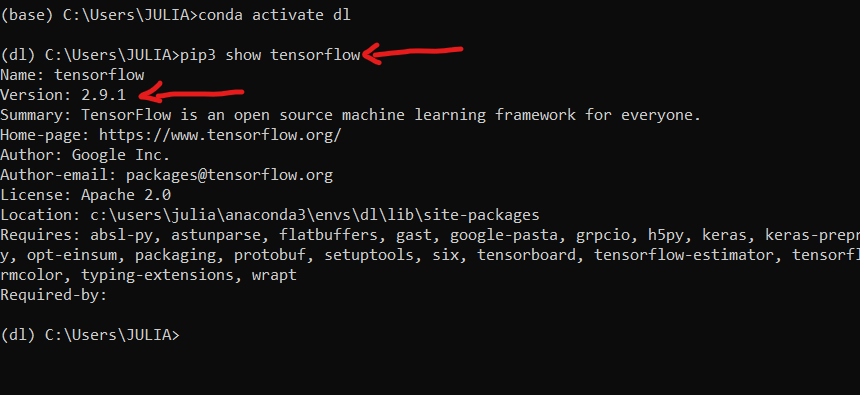

Make sure you have the latest TF version

Prefetch

In [9]:
class FileDataset(tf.data.Dataset):
    def read_file_in_batches(num_samples): #supply the number of sample we want to read time.sleep(0.03)
#We use time.sleep to mimic the time to open a file

        for sample_idx in range(num_samples):
            time.sleep(0.015)
#Read each line from the document one by one (simulation)

            yield (sample_idx,)
#yield has almost the same function as return. There are two major differences between the working of yield and return statements in python. Return statement stops the execution of the function.

    def __new__(cls, num_samples=3):
        return tf.data.Dataset.from_generator(
            cls.read_file_in_batches,
            output_signature = tf.TensorSpec(shape = (1,), dtype = tf.int64),
            args=(num_samples,)
        )

In [10]:
def benchmark(dataset, num_epochs=2): #training function
    for epoch_num in range(num_epochs): #simulating an epoch where we need to go trhough of each sample in the dataset
        for sample in dataset:
            # Performing a training step
            time.sleep(0.01)

In [11]:
%%timeit
benchmark(FileDataset())

346 ms ± 16.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%timeit
benchmark(FileDataset().prefetch(1))
#You can see that with prefetch we have better performance
#IF you have more epochs you will have more difference

282 ms ± 8.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
benchmark(FileDataset().prefetch(tf.data.AUTOTUNE))

289 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Cache

In [14]:
dataset = tf.data.Dataset.range(5)
for x in dataset:
    print(x.numpy())
#creating a dataset (bunch of numbers)

0
1
2
3
4


In [15]:
dataset = dataset.map(lambda x: x**2) #compute the square of that
for x in dataset:
    print(x.numpy())

0
1
4
9
16


In [16]:
dataset = dataset.cache("mycache.txt")
list(dataset.as_numpy_iterator()) #It's the same thing as iteration but on a list

[0, 1, 4, 9, 16]

In [17]:
#When we will write
list(dataset.as_numpy_iterator())
#it will be reading the data from the cache
#it's not executing the map function again

[0, 1, 4, 9, 16]

In [18]:
def mapped_function(s):
    # Do some pre-processing
    tf.py_function(lambda: time.sleep(0.03), [], ())
    return s

In [19]:
%%timeit -r1 -n1
benchmark(FileDataset().map(mapped_function), 5) #Let's run it 5 epochs

1.42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
%%timeit -r1 -n1
benchmark(FileDataset().map(mapped_function).cache(), 5) #Let's run it witch cache

514 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [21]:
#Better performance !